In [1]:
import os
import glob
import csv

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_2 = pd.read_csv('../output/csi_data.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,sub22,sub23,sub24,sub25,sub26,sub27,sub28,sub29,sub30,label
0,21.095023,26.305893,29.068884,30.000000,31.827661,32.000000,33.301652,32.140317,33.015148,33.955854,...,33.241540,33.301652,33.060551,31.144823,30.066593,28.425341,26.476405,22.825424,19.104973,0
1,18.384776,23.769729,25.495098,27.073973,28.017851,28.861739,29.154759,29.410882,29.068884,29.410882,...,30.066593,30.479501,30.265492,28.017851,26.925824,26.000000,23.853721,21.023796,17.464249,0
2,20.615528,26.019224,28.017851,30.083218,31.304952,32.310989,33.105891,32.893768,34.885527,34.205263,...,33.105891,31.953091,31.780497,31.384710,28.792360,28.301943,27.294688,22.627417,20.248457,0
3,20.808652,27.073973,29.068884,30.413813,31.906112,32.984845,32.449961,33.734256,34.409301,34.234486,...,33.421550,33.136083,33.421550,31.256999,30.805844,29.120440,26.400758,23.706539,20.000000,0
4,21.095023,26.305893,29.000000,30.149627,31.622777,32.557641,33.837849,33.541020,33.600595,34.234486,...,33.015148,32.388269,33.015148,31.400637,29.681644,28.460499,26.570661,22.472205,19.723083,0


In [3]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target, test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (838860, 30)
X_test.shape:  (209715, 30)


In [5]:
# Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(X_data)
# data_scaled
# print(data_scaled)
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)

[[-0.4377487  -0.22671384 -0.21263364 ... -0.23467084 -0.30106064
  -0.4431347 ]
 [-0.93691384 -0.97006184 -0.88188411 ... -0.77519258 -0.87058014
  -0.4431347 ]
 [-0.49417063 -0.44532869 -0.19359977 ... -0.29407672  0.09585938
  -0.4431347 ]
 ...
 [-0.49417063 -0.49004329 -0.52469401 ...  0.96762047  1.05850306
  -0.4431347 ]
 [-0.53594503 -0.64165559 -0.59697916 ...  0.56628035  0.98275555
  -0.4431347 ]
 [-0.41535134 -0.40095457 -0.48884897 ...  0.70043239  0.70384589
  -0.4431347 ]]


In [6]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled

array([[-0.48283662, -0.59574676, -0.70283868, ..., -0.89768049,
        -0.87058014, -0.4431347 ],
       [ 0.10606021,  0.09053491,  0.10408166, ..., -0.10446815,
         0.36499109, -0.4431347 ],
       [ 0.29260093,  0.01530456,  0.08949137, ..., -0.07871806,
        -0.01646622, -0.4431347 ],
       ...,
       [-0.49417063, -0.49004329, -0.52469401, ...,  0.96762047,
         1.05850306, -0.4431347 ],
       [-0.53594503, -0.64165559, -0.59697916, ...,  0.56628035,
         0.98275555, -0.4431347 ],
       [-0.41535134, -0.40095457, -0.48884897, ...,  0.70043239,
         0.70384589, -0.4431347 ]])

In [7]:
x_train = x_train.values.reshape(838860, 30, 1)
x_test = x_test.values.reshape(209715, 30, 1)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (838860, 30, 1)
X_test.shape:  (209715, 30, 1)


In [8]:
# Set up parameters
n_steps = 30
n_features = 1
epochs = 2

# Create a traditional RNN network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(
    n_steps, n_features),  return_sequences=True,))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            16896     
_________________________________________________________________
dense (Dense)                (None, 30, 32)            2080      
_________________________________________________________________
dense_1 (Dense)              (None, 30, 1)             33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp1 = ModelCheckpoint('../save/rnn_model/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy', metrics=['BinaryAccuracy'])

In [10]:
model_RNN = model.fit(x_train, y_train, epochs=epochs,
                      batch_size=100, callbacks=[early_stopping, cp1])


Epoch 1/2
8389/8389 [==============================] - 94s 11ms/step - loss: 0.3915 - binary_accuracy: 0.8599
Epoch 2/2
8389/8389 [==============================] - 95s 11ms/step - loss: 0.3671 - binary_accuracy: 0.8653


In [11]:
print(model_RNN.history)


{'loss': [0.39145106077194214, 0.3670966327190399], 'binary_accuracy': [0.8598952889442444, 0.8653389811515808]}


In [12]:
best_score = max(model_RNN.history['binary_accuracy'])

print(best_score)

0.8653389811515808


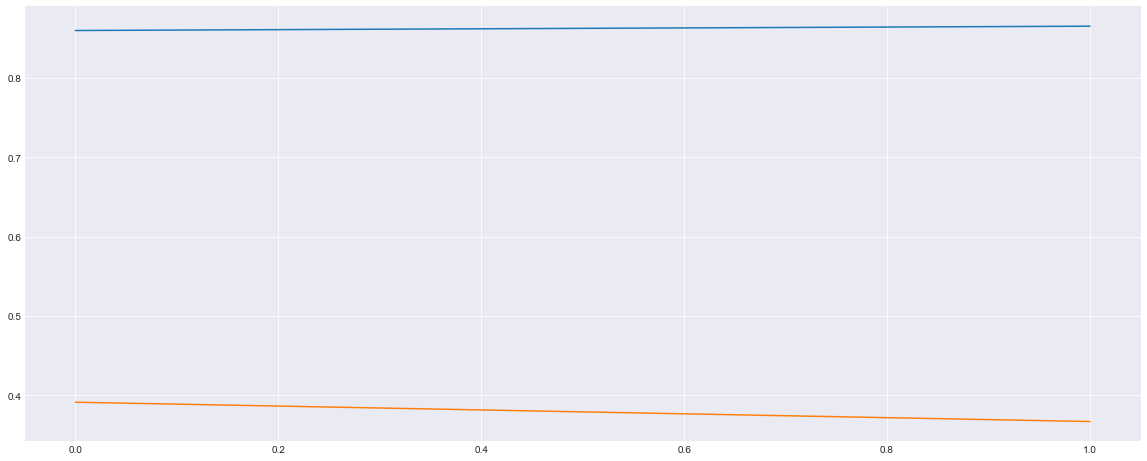

In [13]:
plt.plot(model_RNN.history['binary_accuracy'])
plt.plot(model_RNN.history['loss'])


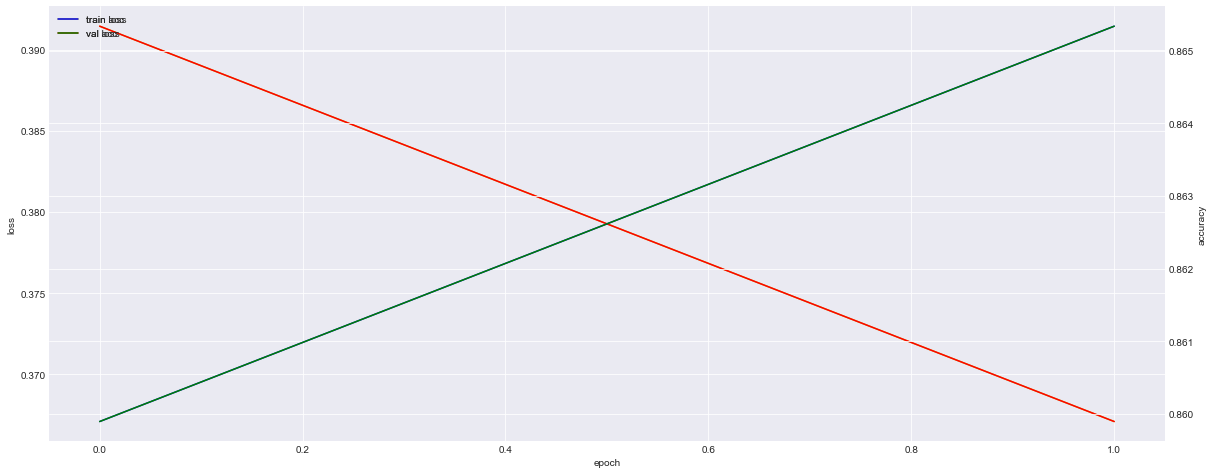

In [21]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(model_RNN.history['loss'], 'y', label='train loss')
loss_ax.plot(model_RNN.history['loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(model_RNN.history['binary_accuracy'], 'b', label='train acc')
acc_ax.plot(model_RNN.history['binary_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
